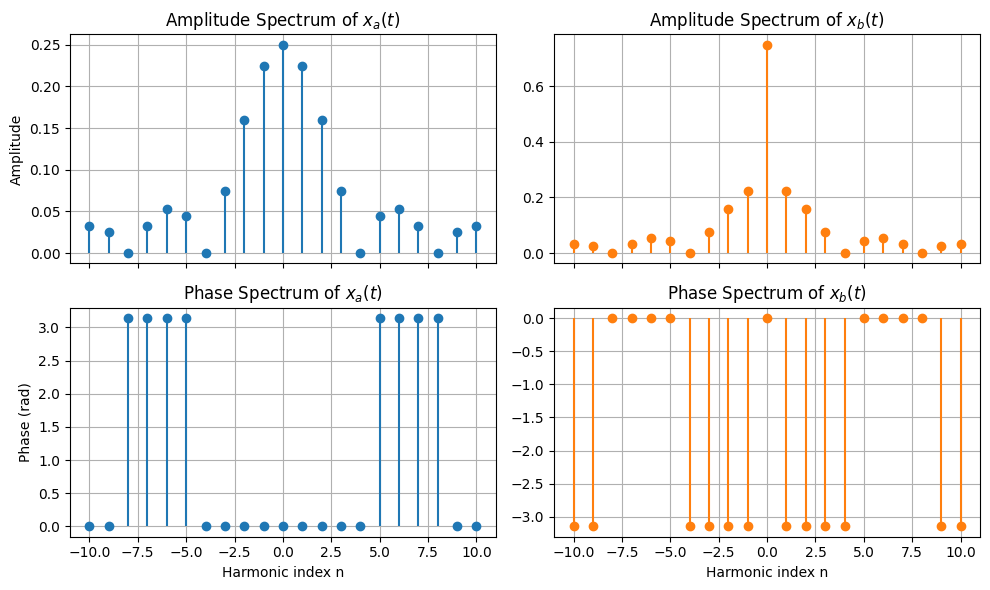

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters:
A    = 1.0    # pulse amplitude
T0   = 1.0    # fundamental period
tau  = 0.25   # pulse width
Nmax = 10     # plot harmonics from -Nmax to Nmax

# Fundamental frequency:
f0 = 1.0/T0

# Define the nth Fourier coefficient for the pulse x_a(t):
#   x_a(t) = A on [0, tau], 0 elsewhere in one period
#   X_a(n) = (A * tau / T0) * sinc(n * f0 * tau)
#
# Here we define a custom "sinc" = sin(pi x)/(pi x) to match typical FT conventions.
def rect_pulse_coeff(n, A, tau, T0):
    if n == 0:
        # DC term = average value over one period
        return A * (tau / T0)
    else:
        x = np.pi * n * (tau / T0)
        return (A * tau / T0) * np.sin(x)/x

# Compute X_a(n) for n in [-Nmax .. Nmax].
nVals = np.arange(-Nmax, Nmax+1)
X_a   = np.array([rect_pulse_coeff(n, A, tau, T0) for n in nVals], dtype=complex)

# For x_b(t) = - x_a(t) + A:
#  -- For n != 0 :  X_b(n) = - X_a(n)
#  -- For n =  0 :  X_b(0) = - X_a(0) + A
X_b = np.array([-X_a[k] for k in range(len(nVals))], dtype=complex)
i0  = np.where(nVals == 0)[0]  # index where n=0
X_b[i0] = -X_a[i0] + A

# Get amplitude and phase spectra
Amp_a  = np.abs(X_a)
Phase_a= np.angle(X_a)  # in radians
Amp_b  = np.abs(X_b)
Phase_b= np.angle(X_b)

# Plot amplitude spectra (double-sided)
fig, axs = plt.subplots(2, 2, figsize=(10,6), sharex=True)

axs[0,0].stem(nVals, Amp_a, basefmt=" ")
axs[0,0].set_title("Amplitude Spectrum of $x_a(t)$")
axs[0,0].set_ylabel("Amplitude")
axs[0,0].grid(True)

axs[0,1].stem(nVals, Amp_b, basefmt=" ", linefmt='C1-', markerfmt='C1o')
axs[0,1].set_title("Amplitude Spectrum of $x_b(t)$")
axs[0,1].grid(True)

# Plot phase spectra (double-sided)
axs[1,0].stem(nVals, Phase_a, basefmt=" ")
axs[1,0].set_title("Phase Spectrum of $x_a(t)$")
axs[1,0].set_xlabel("Harmonic index n")
axs[1,0].set_ylabel("Phase (rad)")
axs[1,0].grid(True)

axs[1,1].stem(nVals, Phase_b, basefmt=" ", linefmt='C1-', markerfmt='C1o')
axs[1,1].set_title("Phase Spectrum of $x_b(t)$")
axs[1,1].set_xlabel("Harmonic index n")
axs[1,1].grid(True)

plt.tight_layout()
plt.show()
